<a href="https://colab.research.google.com/github/sukilsiva/Machine-Learnig-Deep-Learning-Code/blob/master/REALFAKEFACEDETECTION_INCEPTION_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Lambda, Input, Flatten, Dense
from keras.models import Sequential, Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from glob import glob

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [0]:
IMAGE_SIZE = [128,128]

In [0]:
inception = InceptionV3(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

87916544/87910968 [==============================] - 3s 0us/step


In [0]:
!git clone https://github.com/SkyThonk/real-and-fake-face-detection.git

Cloning into 'real-and-fake-face-detection'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2074 (delta 1), reused 0 (delta 0), pack-reused 2068
Receiving objects: 100% (2074/2074), 278.04 MiB | 35.54 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [0]:
for layer in inception.layers:
  layer.trainable = False

In [0]:
folder = glob("/content/real-and-fake-face-detection/dataset/training/*")

In [0]:
x = Flatten()(inception.output)

In [0]:
prediction = Dense(len(folder), activation = 'softmax')(x)

In [0]:
model = Model(inputs=inception.input, outputs=prediction)

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 63, 63, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 63, 63, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
traindatagen = ImageDataGenerator(rescale=1/255.0,
                             zoom_range=0.2,
                             shear_range=0.2,
                             horizontal_flip=False)

In [0]:
testdatagen = ImageDataGenerator(rescale=1/255.0,
                                 zoom_range=0.2,
                                 shear_range=0.2,
                                 horizontal_flip=False)

In [0]:
training_data = traindatagen.flow_from_directory(directory='/content/real-and-fake-face-detection/dataset/training',
                                                 batch_size=32,
                                                 target_size=IMAGE_SIZE,
                                                 class_mode='categorical')

In [0]:
testing_data = testdatagen.flow_from_directory(directory='/content/real-and-fake-face-detection/dataset/test',
                                                 batch_size=32,
                                                 target_size=IMAGE_SIZE,
                                                 class_mode='categorical')

Found 604 images belonging to 2 classes.


In [0]:
Results = model.fit_generator(generator=training_data,
                              steps_per_epoch=len(training_data),
                              epochs=10,
                              validation_data=testing_data,
                              validation_steps=len(testing_data))

Epoch 1/10
45/45 [==============================] - 38s 854ms/step - loss: 0.8441 - accuracy: 0.5136 - val_loss: 1.2892 - val_accuracy: 0.4967
Epoch 2/10
45/45 [==============================] - 24s 538ms/step - loss: 0.7668 - accuracy: 0.5929 - val_loss: 1.3879 - val_accuracy: 0.4437
Epoch 3/10
45/45 [==============================] - 26s 583ms/step - loss: 0.8050 - accuracy: 0.5706 - val_loss: 1.7979 - val_accuracy: 0.5000
Epoch 4/10
45/45 [==============================] - 26s 578ms/step - loss: 0.8256 - accuracy: 0.5894 - val_loss: 1.0336 - val_accuracy: 0.5199
Epoch 5/10
45/45 [==============================] - 26s 581ms/step - loss: 0.8180 - accuracy: 0.5894 - val_loss: 1.8628 - val_accuracy: 0.5199
Epoch 6/10
45/45 [==============================] - 26s 580ms/step - loss: 0.7585 - accuracy: 0.6207 - val_loss: 2.0517 - val_accuracy: 0.5116
Epoch 7/10
45/45 [==============================] - 26s 577ms/step - loss: 0.7605 - accuracy: 0.6180 - val_loss: 2.2695 - val_accuracy: 0.5149

In [0]:
def image_precitions(pic):
  test_image = image.load_img(pic, target_size=IMAGE_SIZE)
  plt.axis('off')
  plt.imshow(test_image)
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis=0) 
  result = model.predict(test_image)
  if result[0][0] == 1:
    predictions = 'Real'
  else:
    predictions = 'Fake'
    
  print("Predictions:",predictions)

Enter the Image To be Predicted:/content/real-and-fake-face-detection/dataset/face_pred/check4.jpg
Predictions: Fake


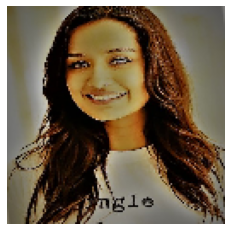

In [0]:
from keras.preprocessing import image

img = input("Enter the Image To be Predicted:")
test_image1 = image_precitions(img)